## Doppler Shifts in Cen X-3 Chandra Observation

Within a Cen X-3 Chandra observation, some very prominent Doppler shifts in the Fe xxv central energy were observed in phase resolved analysis.

In this example, we will explore how these shifts are compatible with the emitting plasma's ballistic movement around the orbit.


In [1]:
##DOPPLER PAKG EXAMPLES
import ast

import sys
sys.path.append('/Users/graci/Desktop')
import random

import xraybinaryorbit
from xraybinaryorbit import *


HELLO, nice to see you! :)

PLEASE READ THIS, IT'S VERY IMPORTANT:

These are the units that must be used within this package:

- Rstar: Solar radius
- Mstar: Solar masses
- Inclination: Sexagesimal degrees
- Periapsis: Sexagesimal degrees
- Semimajor: Stellar radius
- Periods: Days (Periods in the case of the period_sliding_window function will support any units)
- Iphase: Radians

A list of the functions contained in this package will be displayed by runing the function list_functions().

As these functions use a lot of parameters, which can sometimes be difficult to handle, we have implemented a user-friendly method for parameter input:
A form will be displayed, and the parameters will be saved in the directory for further interactions. These saved parameters will be used if new parameters are not provided.
For the function to work, the submit button must be pressed.

Please, take into account that fits in general will take A LOT of time to complete.

If you need help, contact grac

In [2]:
# REAL DATA

# Known orbital phases for each time bin
phase_array = np.array([0.21901885, 0.24120082, 0.2522918 , 0.26338279, 0.27447377,
       0.28556475, 0.29665574, 0.30774672, 0.31883771, 0.32715595,
       0.33270144, 0.33824693, 0.35488341, 0.3604289 , 0.36597439,
       0.37706538, 0.38815636, 0.40479284, 0.41033833])

# Time bins: The beguining and end are provided. 
x = np.array([[7.97000557e+08, 7.97002557e+08],
       [7.97004557e+08, 7.97006557e+08],
       [7.97006557e+08, 7.97008557e+08],
       [7.97008557e+08, 7.97010557e+08],
       [7.97010557e+08, 7.97012557e+08],
       [7.97012557e+08, 7.97014557e+08],
       [7.97014557e+08, 7.97016557e+08],
       [7.97016557e+08, 7.97018557e+08],
       [7.97018557e+08, 7.97020557e+08],
       [7.97020557e+08, 7.97021557e+08],
       [7.97021557e+08, 7.97022557e+08],
       [7.97022557e+08, 7.97023557e+08],
       [7.97025557e+08, 7.97026557e+08],
       [7.97026557e+08, 7.97027557e+08],
       [7.97027557e+08, 7.97028557e+08],
       [7.97029557e+08, 7.97030557e+08],
       [7.97031557e+08, 7.97032557e+08],
       [7.97034557e+08, 7.97035557e+08],
       [7.97035557e+08, 7.97036557e+08]])

# Emission line evolution
y = np.array([6.68379, 6.80991, 6.67892, 6.70604, 6.59522, 6.69305, 6.78357,
       6.7602 , 6.71054, 6.59051, 6.58941, 6.6197 , 6.6798 , 6.73628,
       6.72427, 6.70338, 6.81985, 6.60144, 6.60003])



# Emission line evolution positive and negative errors
y_err = np.array([[0.01962, 0.01599, 0.0353 , 0.02163, 0.01522, 0.02066, 0.01784,
        0.0408 , 0.09066, 0.01051, 0.00941, 0.0344 , 0.0998 , 0.02562,
        0.02753, 0.03273, 0.08475, 0.02144, 0.02003],
       [0.09961, 0.01009, 0.04271, 0.02659, 0.12467, 0.01667, 0.03643,
        0.03073, 0.03159, 0.02861, 0.01781, 0.04638, 0.09535, 0.0397 ,
        0.03344, 0.10163, 0.00015, 0.06801, 0.04635]])



### In this observation, the Fe xxvi emission line energy exhibited remarkable Doppler shifts. In this example, we will utilize the fit_disc_ps function from the xraybinaryorb package to disentangle this intriguing behavior.

Text(0, 0.5, 'Fe xxi energy evolution')

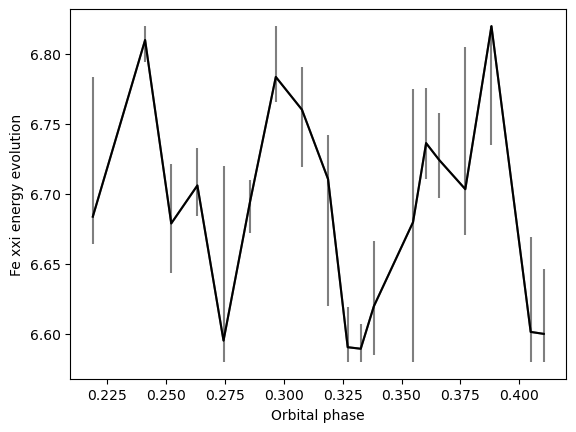

In [3]:
plt.errorbar(phase_array,y, yerr =y_err,fmt="k", alpha=0.5)
plt.errorbar(phase_array,y,fmt="k")
plt.xlabel("Orbital phase")
plt.ylabel("Fe xxi energy evolution")

In [5]:
result, phase, dphase, predicted_data, r_squared = fit_disc_ps(x, y, y_err=y_err, num_iterations=3, maxiter = 1000, swarmsize = 100, units="keV",method_="extended",extended_binsize=0.01)


    --------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    fit_disc_ps fits orbital modulation data by estimating parameters such as phase, semi-major axis, orbital period, eccentricity, inclination for the main orbit, and corresponding parameters for a secondary orbit (e.g., ballistic capture of matter around a compact object or an accretion disk).

    The fitting process uses a particle swarm optimization (PSO) algorithm, which iteratively improves parameter estimates by minimizing the chi-squared difference between observed and predicted data.

    The function can handle two fitting methods:

    - Discrete: Suitable for discrete data points (e.g., spectra with small orbital phase ranges, faster).
    - Extended: Suitable for data with varying or extended bin sizes, typical with current instrument resolutions (e.g., XMM-Newton and Chandra) and short X-ray binary

Text(0, 0.5, 'Fe xvv Doppler shifts')

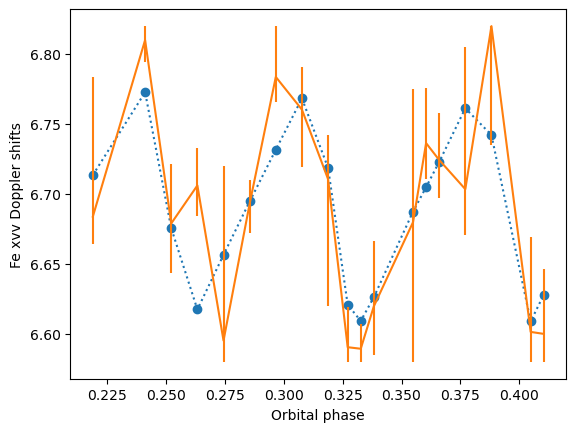

In [10]:
plt.plot(phase_array,  predicted_data,"o:")
plt.errorbar(phase_array, y, yerr=y_err)
plt.xlabel("Orbital phase")
plt.ylabel("Fe xvv Doppler shifts")

In [11]:
result

Name of the parameter,iphase,semimajor,orbitalperiod,eccentricity,periapsis,inclination,Rstar,Mstar1,Mstar2,iphase2,semimajor2,orbitalperiod2,eccentricity2,periapsis2,inclination2,Mass3,feature,wind_vel
Value,0.215708,1.585987,2.087662,0.017558,6.434535e-71,73.285397,12.106157,9.97116,1.331436,0.000000,0.924134,0.146853,0.267417,182.441432,66.541542,6.993386e-15,6.693717,3.059609e-71
Std,0.003397,0.011719,0.000339,0.020592,1.461328e-71,1.066414,0.159705,3.10136,0.052702,0.342472,0.035299,0.045938,0.197354,99.512917,0.038714,1.677813e-15,0.009743,2.103988e-71
